# RECHERCHE OPERATIONNELLE - PROJET 
#### Groupe 2 - Mattéo BOULITEAU -  Kagnana ITH - Nejma MOUALHI


# Table des matières
- [Contexte](#contexte)
- [Problématique](#problématique)
- [Contraintes](#contraintes)
- [Livrables attendus](#livrables-attendus)
- [Caractéristiques du problème](#caractéristiques-du-problème)
- [1. Modélisation du TSP](#1-modélisation-du-TSP)
   - [1.1. Données](#11-données)
   - [1.2. Variables de décision](#12-variables-de-décision)
   - [1.3. Fonction objectif](#13-fonction-objectif)
   - [1.4. Contraintes](#14-contraintes)

- [2. Méthode de résolution](#2-méthode-de-résolution)
   - [2.1. Méthode exacte : Programme linéaire en nombres entiers (PLNE)](#21-méthode-exacte--programme-linéaire-en-nombres-entiers-plne)
      - [2.1.1. Description de la méthode PLNE](#211-description-de-la-méthode-plne)
      - [2.1.2. Solveur CPLEX](#212-solveur-cplex)
      - [2.1.3. Résultats de la méthode PLNE](#213-résultats-de-la-méthode-plne)
   - [2.2. Méthode heuristique ](#22-méthode-heuristique)
   - [2.2. Métaheuristique : GRASP](#222-métaheuristique--grasp)
 
- [3. Solution choisie](#3-solution-choisie)
    - [3.1. Justification de la solution choisie](#31-justification-de-la-solution-choisie)
      - [3.1.1. Comparaison des méthodes](#311-comparaison-des-méthodes)
    - [3.2. Présentation de la solution choisie](#32-présentation-de-la-solution-choisie)

- [4. Implémentation de la méthode choisie](#4-implémentation-de-la-méthode-choisie)
    ...

- [5. Conclusion](#5-conclusion)
   - [5.1. Analyse des résultats](#51-analyse-des-résultats)



- [Bibliographie](#bibliographie)



## Contexte
L’ADEME a lancé un appel à manifestation d’intérêt pour expérimenter de nouvelles solutions de mobilité adaptées aux territoires.

Nous sommes CesiCDP, déjà engagés dans la mobilité multimodale intelligente, et nous répondons à cet appel pour obtenir de nouveaux financements. Le projet vise à réduire les déplacements et la consommation des véhicules lors des livraisons, en résolvant un problème algorithmique d’optimisation de tournée sur un réseau routier.

## Problématique
Nous nous demandons comment optimiser les tournées de livraison pour réduire les déplacements et la consommation des véhicules. Nous devons prendre en compte plusieurs contraintes, telles que la capacité des véhicules, les fenêtres de temps pour les livraisons, et la distance entre les points de livraison.

## Contraintes
Nous avons décidé de rajouter des contraintes pour rendre le problème plus réaliste en se basant sur un système de livraison de colis. Voici les contraintes que nous avons retenues :
1. **Fenêtres temporelles (Time Windows)** : 
    - Chaque ville doit être visitée dans un certain intervalle de temps. Par exemple, si une ville est disponible uniquement de 8 h à 10 h, le parcours doit respecter cette contrainte.
2. **Routes dynamiques ou perturbations** : Les routes peuvent changer pendant la tournée (ex : accidents, météo, fermeture soudaine).
    - Simuler des perturbations dans les données.

## Livrables attendus
1. Modélisation

2. Livrable final du projet

## Caractéristiques du problème

- **Variables de décision** : $x_{ij}$  
    $x_{ij}$ représente si le trajet entre la ville $i$ et la ville $j$ est emprunté ou non.

- **Contraintes** : 
    - Chaque ville doit être visitée une seule fois.
    - Le point de départ et d'arrivée doit être le même.
    - Fenêtre temporelles : Chaque ville doit être visitée dans un certain intervalle de temps.
    - Routes dynamiques et perturbations : Prévision de perturbations dans les données.

- **Objectif** : Trouver un itinéraire optimisé qui nous permet de passer par toutes les villes de la tournée en une seule fois et retourner au point de départ.

Une fois que nous avons explicité le problème, nous allons le modéliser de manière mathématique.  
Nous remarquons que notre problème est une version métrique du problème du voyageur de commerce (TSP) avec des contraintes supplémentaires le rendant plus réaliste.

### Version algorithmique du problème :

- **Donnée** : Un graphe complet pondéré $G(S, A)$ avec un ensemble de sommets $S$ et un ensemble d'arêtes $A$.
- **Tâche** : Trouver un cycle hamiltonien dans $G$ en minimisant la somme des poids des arêtes du cycle.

## 1 - Modélisation du TSP

### 1.1 Données

- Un ensemble de villes $V = \{v_1, v_2, \ldots, v_n\}$
- Un graphe complet pondéré $G = (V, E)$
- Une fonction de coût $c_{ij} \geq 0$, représentant la distance ou le temps entre les villes $i$ et $j$

La nature du graphe est la suivante :
- On reste sur un graphe complet : on suppose qu'il existe une route (au moins théorique) entre chaque paire de villes. 

### 1.2 Variables de décision

- $x_{ij} \in \{0,1\}$ : vaut 1 si l'on va de la ville $i$ à la ville $j$, 0 sinon

### 1.3 Fonction objectif

Minimiser la somme des coûts de déplacement :

$$\min \sum_{i=1}^{n} \sum_{j=1}^{n} c_{ij} \cdot x_{ij}$$

### 1.4 Contraintes

1. Chaque ville est quittée une seule fois :

$$\sum_{j=1}^{n} x_{ij} = 1 \quad \forall i \in \{1, \dots, n\}$$

2. Chaque ville est visitée une seule fois :

$$\sum_{i=1}^{n} x_{ij} = 1 \quad \forall j \in \{1, \dots, n\}$$

3. Time windows, chaque ville doit être visitée dans un certain intervalle de temps :
$$\forall i \in \{1, \dots, n\}, \quad s_i \leq t_i \leq e_i$$
où : 
- $s_i$ est le début de la fenêtre temporelle pour la ville $i$
- $t_i$ est le temps d'arrivée à la ville $i$
- $e_i$ est la fin de la fenêtre temporelle pour la ville $i$

4. Routes dynamiques ou perturbations :
$$\forall i,j \in \{1, \dots, n\}, \quad c_{ij} = c_{ij}(t)$$
où $c_{ij}(t)$ est la distance entre les villes $i$ et $j$ à l'instant $t$. Cette contrainte permet de prendre en compte les changements de conditions de circulation.

5. Le point de départ et d'arrivée doit être le même :
$$\sum_{i=1}^{n} x_{0i} = 1$$
$$\sum_{j=1}^{n} x_{j0} = 1$$

---

Ce problème est connu pour être **NP-difficile** : il n'existe pas d'algorithme polynomial connu permettant de le résoudre dans le cas général. 
Nous allons nous intéresser à des algorithmes d'approximation, ou méta-heuristiques, qui permettent de trouver des solutions approchées en un temps raisonnable.

## 2 - Méthode de résolution
Dans un premier temps, nous allons aborder la méthode exacte, qui est la méthode de programmation linéaire en nombres entiers (PLNE).

### 2.1 Méthode exacte : Programme linéaire en nombres entiers (PLNE)
#### 2.1.1 Description de la méthode PLNE
La méthode PLNE consiste à modéliser le problème sous forme de programme linéaire, en utilisant des variables de décision binaires pour représenter les choix de parcours entre les villes.

#### 2.1.2 Solveur CPLEX
Le solveur CPLEX est un outil puissant pour résoudre des problèmes d'optimisation linéaire et entière. Il utilise des algorithmes avancés pour trouver des solutions optimales ou approchées à des problèmes complexes.

Nous allons générer les données pour le problème du TSP, puis utiliser CPLEX pour résoudre le problème. 


In [2]:
def generate_data(n, weight_range, time_range, min_time_gap, max_percentage_perturbation, max_edges_perturbated):
    """
    Generates a complete ponderate graph with time windows for each node.

    :param n: Number of nodes to generate
    :param weight_range: Tuple (min_weight, max_weight) for edge weights in minutes
    :param time_range: Tuple (min_time, max_time) for time window limits
    :param min_time_gap: Minimum gap between start and end time for each node
    :param max_percentage_perturbation: Maximum percentage of perturbation for the weights in decimal
    0.0 <= max_percentage_perturbation <= 1.0
    :param max_edges_perturbated: Maximum number of edges that can be perturbated
    :return: complete ponderate graph with time windows
    """

    import random

    # Create a complete ponderate graph
    graph = {}
    time_windows = {}
    perturbated_edges = [] # Counter for perturbated edges

    for i in range(n):
        graph[i] = {}
        for j in range(n):
            if i != j:
                # Random weight between min_weight and max_weight
                weight = random.randint(weight_range[0], weight_range[1])

                # Apply perturbation if within the allowed number of perturbated vectors
                if len(perturbated_edges) < max_edges_perturbated and random.random() < max_percentage_perturbation:
                    perturbation_factor = random.uniform(1.0, 1.0 + max_percentage_perturbation)
                    
                    weight = int(weight * perturbation_factor)  # Apply a random perturbation
                    perturbated_edges.append((i, j))  # Store the perturbated edge

                graph[i][j] = weight  # Weight of the edge is the weight of the item

        # Generate time windows for each node
        start_time = random.randint(time_range[0], time_range[1] - min_time_gap)
        end_time = start_time + min_time_gap
        time_windows[i] = (start_time, end_time)

    return graph, time_windows, perturbated_edges

# Example usage
graph, time_windows, perturbated_edges = generate_data(5, (1, 300), [0, 20], 5, 0.2, 2)
print("Generated Graph:", graph)
print("Time Windows:", time_windows)
print("Perturbated Edges:", perturbated_edges)

Generated Graph: {0: {1: 19, 2: 8, 3: 78, 4: 9}, 1: {0: 181, 2: 57, 3: 119, 4: 256}, 2: {0: 4, 1: 95, 3: 53, 4: 239}, 3: {0: 122, 1: 7, 2: 276, 4: 236}, 4: {0: 272, 1: 64, 2: 22, 3: 81}}
Time Windows: {0: (8, 13), 1: (7, 12), 2: (7, 12), 3: (3, 8), 4: (4, 9)}
Perturbated Edges: [(1, 3), (3, 0)]


Pour nous permettre de visualiser les résultats, nous allons également utiliser la bibliothèque Matplotlib pour tracer le graphe du TSP et afficher la solution trouvée par CPLEX.

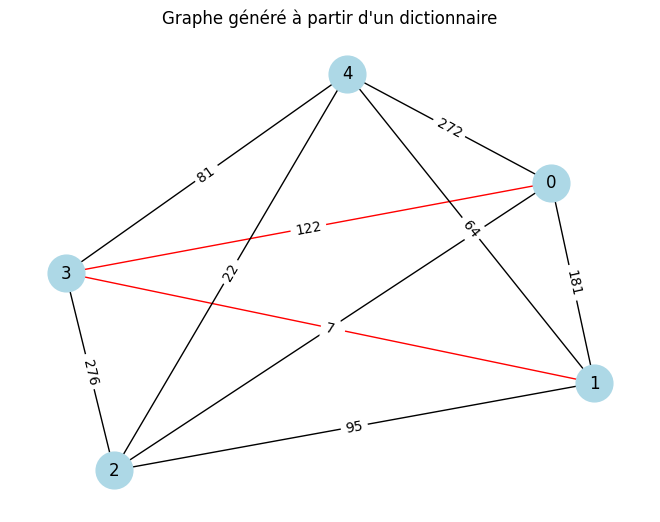

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def dict_to_graph(graph_dict):
    G = nx.Graph()  # For non oriented graph
    for node, neighbors in graph_dict.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    return G

# Creation
G = dict_to_graph(graph)

edge_colors = ['red' if (u, v) in perturbated_edges or (v, u) in perturbated_edges else 'black' for u, v in G.edges]

# Display
pos = nx.spring_layout(G, seed=42)  # set the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Graphe généré à partir d'un dictionnaire")
plt.show()


Ensuite nous allons utiliser le solveur CPLEX pour résoudre le problème du TSP en utilisant la modélisation PLNE.

Nous utilisons le package `docplex` de CPLEX pour modéliser et résoudre le problème.

Il faut installer le package `docplex` et `cplex` pour utiliser CPLEX. 

In [6]:
from docplex.mp.model import Model


def use_solver(graph): 
    model = Model("tsp")
    n = len(graph)

    # define decision variables
    x = model.binary_var_matrix(n, n, name="x")
    time = model.continuous_var_list(n, name="time") # time at which each node is visited

    # define objective function
    model.minimize(model.sum(graph[i][j] * x[i, j] for i in range(n) for j in range(n) if i != j))

    # define constraints
    for i in range(n):
        model.add_constraint(model.sum(x[i, j] for j in range(n) if i != j) == 1, f"out_one_time_{i}")
        model.add_constraint(model.sum(x[j, i] for j in range(n) if i != j) == 1, f"in_one_time_{i}")

        for j in range(n):
            if i != j:
                model.add_constraint(x[i, j] + x[j, i] <= 1, f"no_bidirectional_{i}_{j}")

        # Ensure the first edge of the cycle is also the last edge
        model.add_constraint(model.sum(x[0, j] for j in range(1, n)) == 1, "start_at_0")
        model.add_constraint(model.sum(x[j, 0] for j in range(1, n)) == 1, "end_at_0")

        # time window constraints
        start_time, end_time = time_windows[i]
        # time[i] must be within the time window
        model.add_constraint(time[i] >= start_time * 60, f"time_window_start_{i}")
        model.add_constraint(time[i] <= end_time * 60, f"time_window_end_{i}")

    # Solve the model
    solution = model.solve(log_output=False)
    if solution:
        solution_list = []
        print("Solution found:")
        for i in range(n):
            for j in range(n):
                # Check if the edge is part of the solution
                # 0.5 is the threshold for binary variables
                if x[i, j].solution_value > 0.5:
                    solution_list.append((i, j))
                    print(f"Edge from {i} to {j} with weight {graph[i][j]} minutes")


        cycle = [0] # Start from the first node
        # Reconstruct the cycle
        visited = set(cycle) 
        # Because the solution is not necessarily a cycle that visits all nodes
        while len(visited) < n:
            for edge in solution_list:
                if edge[0] == cycle[-1] and edge[1] not in visited:
                    cycle.append(edge[1])
                    visited.add(edge[1])
                    break

        cycle.append(0) # add the end node to complete the cycle

        print ("Cycle:", cycle)
        print("Total weight:", model.objective_value / 60, "hours")
    else:
        print("No solution found.")

use_solver(graph)

Solution found:
Edge from 0 to 2 with weight 16 minutes
Edge from 1 to 4 with weight 128 minutes
Edge from 2 to 1 with weight 10 minutes
Edge from 3 to 0 with weight 101 minutes
Edge from 4 to 3 with weight 17 minutes
Cycle: [0, 2, 1, 4, 3, 0]
Total weight: 4.533333333333333 hours


    Solution found:
    Edge from 0 to 2 with weight 16 minutes
    Edge from 1 to 4 with weight 128 minutes
    Edge from 2 to 1 with weight 10 minutes
    Edge from 3 to 0 with weight 101 minutes
    Edge from 4 to 3 with weight 17 minutes
    Cycle: [0, 2, 1, 4, 3, 0]
    Total weight: 4.533333333333333 hours

    ### Analyse des résultats
    En prenant un petit échantillon de données, nous avons trouvé une solution avec un coût total de 4.53 heures.
    L'instance de données est relativement petite, ce qui permet à CPLEX de trouver une solution optimale rapidement.
    Si nous augmentons la taille de l'instance, le temps de calcul augmente également et nous pourrions ne pas trouver de solution optimale dans un temps raisonnable. De plus, la méthode PLNE ne garantit pas de solution optimale pour des instances de grande taille.

    Testons avec une instance plus grande de 100 villes et observons les résultats.

    

### 2.1.3 Résultats et limites de la méthode PLNE
L'exemple précédent montre que pour une petite instance (5 villes), le PLNE résout efficacement le problème et trouve une solution optimale. Cependant, cette méthode présente des limitations importantes lorsque la taille du problème augmente.
Pour illustrer ces limitations, nous avons réalisé une série de tests sur des instances de différentes tailles, allant de 5 à 50 villes. Voici les résultats obtenus :

In [23]:
# Test avec différentes tailles d'instances
city_sizes = [5, 10, 15, 20, 30, 50]
execution_times = []
solution_quality = []

for n in city_sizes:
    print(f"Test avec {n} villes:")
    graph, time_windows, _ = generate_data(n, (1, 300), (0, 20), 5, 0.2, int(n*0.1))
    
    start_time = time.time()
    try:
        # Définir un timeout pour éviter des calculs trop longs
        timeout = 600  # 10 minutes
        result = use_solver_with_timeout(graph, timeout)
        execution_time = time.time() - start_time
        
        if result["status"] == "optimal":
            print(f"  Solution optimale trouvée en {execution_time:.2f} secondes")
            print(f"  Coût total: {result['objective_value']}")
        else:
            print(f"  Timeout atteint après {timeout} secondes")
            execution_time = timeout  # Plafonner à la valeur du timeout
    except Exception as e:
        print(f"  Erreur: {e}")
        execution_time = float('inf')
    
    execution_times.append(execution_time)

Test avec 5 villes:


TypeError: generate_data() takes 2 positional arguments but 6 were given

## 2.2 Méthode heuristique

Après avoir étudié la méthode exacte (PLNE), nous allons maintenant nous intéresser aux méthodes heuristiques. Ces méthodes proposent des solutions approchées, mais en un temps de calcul considérablement réduit par rapport aux méthodes exactes.

### 2.2.1. Heuristiques classiques pour le TSP

Les heuristiques classiques pour le TSP (Traveling Salesman Problem) incluent des approches gloutonnes comme l'algorithme du plus proche voisin. Ces méthodes sont rapides, mais elles présentent des limitations théoriques importantes :

*   **Optimalité locale vs. globale**: Les heuristiques gloutonnes optimisent localement à chaque étape, sans garantie de convergence vers un optimum global.
*   **Complexité algorithmique et NP-complétude**: Le TSP est un problème NP-complet, ce qui signifie qu'il n'existe pas d'algorithme polynomial connu pour le résoudre de manière exacte. Même avec des heuristiques, la taille de l'espace de recherche rend les approches déterministes classiques inopérantes pour des instances de grande taille. 
*   **Absence de garanties théoriques**: Aucune heuristique simple ne peut assurer à la fois un facteur d'approximation constant (sous réserve que $P \neq NP$) et une exploration complète des régions prometteuses de l'espace de solutions.

### 2.2.2 Algorithme du plus proche voisin (Nearest Neighbor Algorithm)

L'algorithme du plus proche voisin est une heuristique gloutonne classique pour le TSP. Il consiste à partir d'une ville de départ et à visiter à chaque étape la ville la plus proche non encore visitée, jusqu'à revenir à la ville de départ.

**Principe de l'algorithme :**
1. Choisir une ville de départ
2. Identifier la ville non visitée la plus proche
3. Se déplacer vers cette ville
4. Répéter les étapes 2-3 jusqu'à ce que toutes les villes soient visitées
5. Retourner à la ville de départ


**Limites de l'algorithme du plus proche voisin :**

L'algorithme du plus proche voisin peut donner des résultats acceptables pour de très petites instances du TSP (par exemple, 4 ou 5 villes). Cependant, comme il s'agit d'une heuristique gloutonne, il ne garantit pas l'optimalité, même pour ces petites instances. De plus, sa performance se dégrade rapidement avec l'augmentation du nombre de villes.

Le TSP est un problème NP-difficile. Cela signifie que le temps de calcul nécessaire pour trouver la solution optimale augmente de manière exponentielle avec la taille du problème.

Comme nous l'avons observé avec la méthode PLNE, le temps de calcul devient prohibitif pour des instances de grande taille. De même, l'algorithme du plus proche voisin, bien que rapide, ne peut pas garantir une solution de qualité acceptable pour des problèmes de taille réaliste. En effet, la qualité de la solution trouvée par le plus proche voisin se détériore rapidement à mesure que la taille de l'instance augmente.

En raison de ces limitations, il est évident que les heuristiques classiques ne suffisent pas pour résoudre efficacement un problème NP-complet tel que le TSP. Nous allons donc explorer des méthodes plus avancées, telles que les métaheuristiques.



## 2.3. Métaheuristiques

Les métaheuristiques sont des stratégies algorithmiques de haut niveau conçues pour résoudre des problèmes d'optimisation complexes, en particulier ceux pour lesquels les méthodes exactes sont inefficaces. Elles combinent des heuristiques de base avec des mécanismes d'exploration et d'exploitation pour échapper aux optima locaux et explorer l'espace de recherche de manière plus efficace.

Cependant, il est important de noter que les métaheuristiques ne garantissent pas toujours la convergence vers une solution optimale. Elles sont souvent utilisées pour obtenir des solutions approchées dans des délais raisonnables, mais elles peuvent également être adaptées pour fournir des garanties de performance dans certains cas.

**Types de métaheuristiques :**

*   **Recherche locale itérative** : Part d'une solution initiale et explore itérativement le voisinage pour trouver une meilleure solution. Exemples : descente de gradient, recuit simulé (Simulated Annealing).
*   **Algorithmes évolutionnaires** : S'inspirent des mécanismes de l'évolution biologique (sélection, mutation, croisement) pour faire évoluer une population de solutions. Exemple : algorithmes génétiques.
*   **Algorithmes basés sur la mémoire** : Utilisent une mémoire pour stocker les solutions déjà visitées et guider la recherche. Exemple : recherche tabou (Tabu Search).
*   **Algorithmes inspirés de la nature** : Imitent des phénomènes naturels ou des comportements collectifs. Exemples : optimisation par colonies de fourmis (Ant Colony Optimization), optimisation par essaims de particules (Particle Swarm Optimization).

### 2.3.1. Méthodes de voisinnage
Les méthodes de voisinage est une notion clé dans les métaheuristiques. Elles consistent à explorer l'espace de recherche en se déplaçant d'une solution à une autre en modifiant légèrement la solution actuelle. Ces modifications sont appelées "voisinages".

Définition : Soit $X$ l'ensemble des configurations possibles d'une solution. On appelle _voisinage_ toute application $N : $X \to X$ qui associe à chaque solution $x \in X$ un ensemble de solutions voisines $N(x)$.
Une solution $x$ est dite _optimum local_ si aucune solution voisine $x'$ n'est meilleure que $x$ selon la fonction objectif.

Une méthode typique de voisinage débute avec une configuration initiale $x_0$ et explore les solutions voisines en appliquant la fonction de voisinage $N$. À chaque itération, la méthode choisit une solution voisine $x' \in N(x)$ et l'évalue. Si $x'$ est meilleure que $x$, elle devient la nouvelle solution courante. Ce processus se répète jusqu'à ce qu'aucune amélioration ne soit trouvée. 

L'un des principaux avantages des méthodes de voisinage est leur simplicité et leur flexibilité. Elles permettent de contrôler le temps de calcul, car l'exploration du voisinage peut être interrompue à tout moment. Cependant, elles sont souvent limitées par leur tendance à se coincer dans des optima locaux. C'est pourquoi elles sont souvent utilisées en combinaison avec d'autres techniques, comme la randomisation ou les mécanismes de diversification, pour échapper à ces optima locaux.

### 2.3.2. Métaheuristique GRASP
Nous avons choisi GRASP (Greedy Randomized Adaptive Search Procedure) pour les raisons suivantes :

*   **Simplicité et efficacité**: GRASP est relativement simple à implémenter et peut fournir de bonnes solutions en un temps raisonnable.
*   **Flexibilité**: GRASP peut être adapté à différents types de problèmes d'optimisation combinatoire.
*   **Capacité à échapper aux optima locaux**: La phase de construction randomisée et la recherche locale permettent à GRASP d'explorer différentes régions de l'espace de recherche.
*   **Preuves empiriques**: GRASP a été appliqué avec succès à de nombreux problèmes de TSP et de VRP (Vehicle Routing Problem).


##### Justification théorique du recours aux métaheuristiques

1.  **Théorème de non-linéarité (No Free Lunch)**: Aucun algorithme d'optimisation ne surpasse universellement les autres sur tous les problèmes. Les métaheuristiques offrent une flexibilité stratégique pour adapter la recherche aux spécificités du problème (exploration/exploitation).

2.  **Réduction des biais de recherche**: Contrairement aux heuristiques déterministes, GRASP intègre :

    *   **Randomisation contrôlée**: Construction de solutions via des listes restreintes de candidats (RCL), évitant les choix prématurés.
    *   **Intensification/diversification**: Phase de recherche locale couplée à une multi-exécution pour couvrir divers bassins d'attraction.



# Bibliographie

1. **Voyageur de commerce - Approche métrique**  
    [https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf](https://www.lri.fr/~hellouin/Agreg/Approx-TSP-m%C3%A9trique.pdf)

2. **Recherche opérationnelle - F. Olive**  
    [https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf](https://pageperso.lis-lab.fr/~frederic.olive/Materiel/roM1/cours.pdf)

3. **Recherche opérationnelle - Nicolas Bousquet**  
    [https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf](https://perso.liris.cnrs.fr/nbousquet/ECL_RO/ro_bousquet.pdf)

4. **Le voyageur de commerce**  
    [http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf](http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf)


5. **Méthodes de résolution exactes, heuristiques et métaheuristiques**  
    [http://www.fsr.ac.ma/DOC/cours/maths/Souad%20Bernoussi/Cours%20C2SI.pdf](http://www.fsr.ac.ma/DOC/cours/maths/Souad%20Bernoussi/Cours%20C2SI.pdf)

6. **Méthaheuristiques pour l’optimisation combinatoire et l’affectation sous contraintes**
[https://www.researchgate.net/publication/220724882_Methaheuristiques_pour_l'optimisation_combinatoire_et_l'affectation_sous_contraintes](https://www.researchgate.net/publication/220724882_Methaheuristiques_pour_l'optimisation_combinatoire_et_l'affectation_sous_contraintes)